In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached tensorflow_gpu-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached grpcio-1.32.0-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninstalling flatbuffers-2.0:
      Successfully uninstalled flatbuffers-2.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.43.0
    Uninstalling grpcio-1.43.0:
      Successfully uninstalled grpcio-1.43.0
  Attempting uninstal

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.8.0 requires tensorflow~=2.8.0, but you have tensorflow 2.4.1 which is incompatible.
tensorflow-text 2.8.0 requires tensorflow<2.9,>=2.8.0, but you have tensorflow 2.4.1 which is incompatible.
tensorflow-cpu 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.


    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.0.0
    Uninstalling absl-py-1.0.0:
      Successfully uninstalled absl-py-1.0.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorflow-2.8.0


In [3]:
!pip install tensorflow-cpu==2.8.0

     ---------------------------------------- 14.7/14.7 MB 1.9 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.8.0 requires tensorflow~=2.8.0, but you have tensorflow 2.4.1 which is incompatible.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.22.3 which is incompatible.
tensorflow-text 2.8.0 requires tensorflow<2.9,>=2.8.0, but you have tensorflow 2.4.1 which is incompatible.
tensorflow-gpu 2.4.1 requires numpy~=1.19.2, but you have numpy 1.22.3 which is incompatible.
apache-beam 2.35.0 requires numpy<1.21.0,>=1.14.3, but you have numpy 1.22.3 which is incompatible.


  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [4]:
!pip install tensorflow==2.8.0 tensorflow-cpu==2.8.0

  Using cached tensorflow-2.8.0-cp38-cp38-win_amd64.whl (438.0 MB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [32]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [33]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [34]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [9]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

In [15]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
!tar -xf lfw.tgz

In [17]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [5]:
# Import uuid library to generate unique image names
import uuid
import os

In [10]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\8349d6cd-a512-11ec-9798-34028698ec4c.jpg'

In [17]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

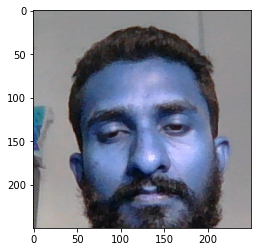

In [16]:
plt.imshow(frame)

In [40]:
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))
            
        data.append(img)
    
    return data

In [2]:
import os

In [30]:
import os
import uuid

In [35]:
img_path = os.path.join(ANC_PATH, '8ab2fbfd-a50f-11ec-a60b-34028698ec4c.jpg')
img = cv2.imread(img_path)
augmented_images = data_aug(img)

for image in augmented_images:
    cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [29]:
for file_name in os.listdir(os.path.join(POS_PATH)):
    img_path = os.path.join(POS_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img) 
    
    for image in augmented_images:
        cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

NameError: name 'tf' is not defined

In [44]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(1690)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(1690)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(1690)

In [45]:
dir_test = anchor.as_numpy_iterator()

In [53]:
print(dir_test.next())

b'data\\anchor\\d8ecbabd-a510-11ec-afa1-34028698ec4c.jpg'


In [49]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0
    
    # Return image
    return img

In [54]:
img = preprocess('data\\anchor\\d8ecbabd-a510-11ec-afa1-34028698ec4c.jpg')

In [55]:
img.numpy().max() 

0.9973039

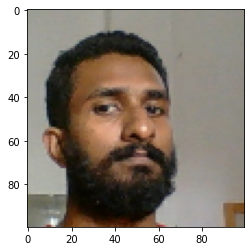

In [56]:
plt.imshow(img)

In [35]:
dataset.map(preprocess)

NameError: name 'dataset' is not defined

In [32]:
tf.zeros(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [143]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [144]:
data

<ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [145]:
samples = data.as_numpy_iterator()

In [146]:
exampple = samples.next()

In [147]:
exampple

(b'data\\anchor\\1ee66f72-a511-11ec-a718-34028698ec4c.jpg',
 b'data\\positive\\199b03b3-a513-11ec-a944-34028698ec4c.jpg',
 1.0)

In [148]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [149]:
res = preprocess_twin(*exampple)

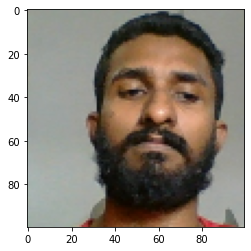

In [150]:
plt.imshow(res[1])

In [151]:
res[2]


1.0

In [152]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [153]:
samples = data.as_numpy_iterator()

In [154]:
exampple = samples.next()

In [155]:
len(samples.next())

3

In [156]:
samp = samples.next()

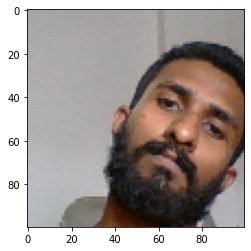

In [157]:
plt.imshow(samp[0])

In [158]:
samp[2]

0.0

In [159]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [160]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [161]:
inp = Input(shape=(100,100,3), name='input_image')

In [162]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [163]:
 m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [164]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [165]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [166]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [167]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [168]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 17, 17, 128)       26

In [169]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [170]:
embedding = make_embedding()

In [175]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 20, 20, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 17, 17, 128)       26

In [172]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [173]:
l1 = L1Dist()

In [174]:
l1(anchor_embedding, validation_embedding)

NameError: name 'anchor_embedding' is not defined

In [94]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [95]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [96]:
siamese_layer = L1Dist()

In [97]:
distances = siamese_layer(inp_embedding, val_embedding)

In [98]:
classifier = Dense(1, activation='sigmoid')(distances)


In [99]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [100]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')


In [101]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [102]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [103]:
siamese_model = make_siamese_model()

In [104]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [105]:
binary_cross_loss = tf.losses.BinaryCrossentropy()


In [106]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001


In [107]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)


In [108]:
test_batch = train_data.as_numpy_iterator()

In [109]:
batch_1 = test_batch.next()

In [110]:
X = batch_1[:2]

In [111]:
y = batch_1[2]

In [112]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [113]:
tf.losses.BinaryCrossentropy??


In [114]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # Return loss
    return loss


In [197]:

# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [182]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [194]:
EPOCHS = 50

In [195]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
148/148 [==============================] - 6688s 45s/step
0.27100414 0.7255735 0.9861432

 Epoch 2/50
148/148 [==============================] - 8029s 54s/step
0.11008394 0.9455319 0.98755556

 Epoch 3/50
148/148 [==============================] - 5506s 37s/step
0.021211114 0.95295125 0.99820787

 Epoch 4/50
100/148 [===================>..........] - ETA: 29:00

KeyboardInterrupt: 

In [185]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [186]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [187]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

array([[0.49907586],
       [0.49943694],
       [0.4994801 ],
       [0.49931875],
       [0.49937528],
       [0.49951932],
       [0.49901676],
       [0.49914008],
       [0.49909064],
       [0.497821  ],
       [0.49729267],
       [0.49959642],
       [0.4992146 ],
       [0.4995799 ],
       [0.49944767],
       [0.49976286]], dtype=float32)

In [188]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [189]:
y_true

array([1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.],
      dtype=float32)

In [190]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

0.0

In [103]:
#unsused
# Creating a metric object 
#m = Precision()

# Calculating the recall value 
#m.update_state(y_true, y_hat)

# Return Recall Result
#m.result().numpy()

1.0

In [198]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

0.9697543 0.9661017


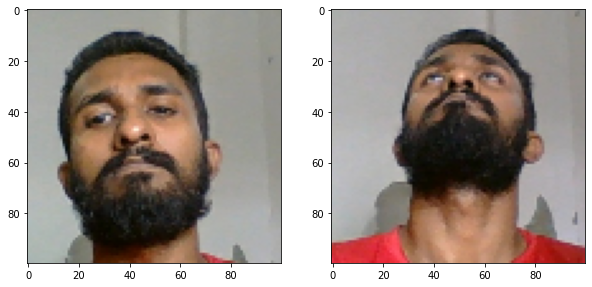

In [200]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

In [201]:
# Save weights
siamese_model.save('siamesemodelv3.h5')

In [121]:
L1Dist

__main__.L1Dist

In [120]:
# Reload model 
model = tf.keras.models.load_model('siamesemodelv2.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})


In [122]:
# Make predictions with reloaded model
model.predict([test_input, test_val])

array([[9.9999952e-01],
       [9.6900568e-09],
       [1.0000000e+00],
       [1.7304780e-10],
       [9.9994022e-01],
       [1.0000000e+00],
       [9.9999237e-01],
       [2.2756113e-07],
       [2.7437568e-09],
       [9.9606967e-01],
       [1.0000000e+00],
       [9.4301140e-07],
       [1.0000000e+00],
       [1.0000000e+00],
       [6.1901133e-09],
       [4.2095781e-08]], dtype=float32)

In [123]:
# View model summary
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [124]:
os.listdir(os.path.join('application_data', 'verification_images'))

['38538ccd-a094-11ec-b5af-308d99bec451.jpg',
 '39237b3a-a094-11ec-941d-308d99bec451.jpg',
 '39490d16-a094-11ec-b488-308d99bec451.jpg',
 '3aa0fb1f-a094-11ec-9dab-308d99bec451.jpg',
 '3ab2f2a7-a094-11ec-be12-308d99bec451.jpg',
 '3ade1e11-a094-11ec-92df-308d99bec451.jpg',
 '3b02091d-a094-11ec-91f3-308d99bec451.jpg',
 '3b09721a-a094-11ec-b80e-308d99bec451.jpg',
 '3b15609b-a094-11ec-b2d1-308d99bec451.jpg',
 '3b1b345c-a094-11ec-8b2f-308d99bec451.jpg',
 '3b21e66f-a094-11ec-b89e-308d99bec451.jpg',
 '3b3f36f0-a094-11ec-aeca-308d99bec451.jpg',
 '3b468525-a094-11ec-9279-308d99bec451.jpg',
 '3b584f15-a094-11ec-9c20-308d99bec451.jpg',
 '3b76e6b4-a094-11ec-9731-308d99bec451.jpg',
 '3ba4bb14-a094-11ec-a836-308d99bec451.jpg',
 '3c353bc3-a094-11ec-b866-308d99bec451.jpg',
 '3c917fce-a094-11ec-af1e-308d99bec451.jpg',
 '3d2a7104-a094-11ec-91d3-308d99bec451.jpg',
 '40622bdd-a094-11ec-9cd0-308d99bec451.jpg',
 '40fb1f79-a094-11ec-983c-308d99bec451.jpg',
 '41b28403-a094-11ec-b2d1-308d99bec451.jpg',
 '41e2a641

In [126]:
os.listdir(os.path.join('application_data', 'verification_images'))

['38538ccd-a094-11ec-b5af-308d99bec451.jpg',
 '39237b3a-a094-11ec-941d-308d99bec451.jpg',
 '39490d16-a094-11ec-b488-308d99bec451.jpg',
 '3aa0fb1f-a094-11ec-9dab-308d99bec451.jpg',
 '3ab2f2a7-a094-11ec-be12-308d99bec451.jpg',
 '3ade1e11-a094-11ec-92df-308d99bec451.jpg',
 '3b02091d-a094-11ec-91f3-308d99bec451.jpg',
 '3b09721a-a094-11ec-b80e-308d99bec451.jpg',
 '3b15609b-a094-11ec-b2d1-308d99bec451.jpg',
 '3b1b345c-a094-11ec-8b2f-308d99bec451.jpg',
 '3b21e66f-a094-11ec-b89e-308d99bec451.jpg',
 '3b3f36f0-a094-11ec-aeca-308d99bec451.jpg',
 '3b468525-a094-11ec-9279-308d99bec451.jpg',
 '3b584f15-a094-11ec-9c20-308d99bec451.jpg',
 '3b76e6b4-a094-11ec-9731-308d99bec451.jpg',
 '3ba4bb14-a094-11ec-a836-308d99bec451.jpg',
 '3c353bc3-a094-11ec-b866-308d99bec451.jpg',
 '3c917fce-a094-11ec-af1e-308d99bec451.jpg',
 '3d2a7104-a094-11ec-91d3-308d99bec451.jpg',
 '40622bdd-a094-11ec-9cd0-308d99bec451.jpg',
 '40fb1f79-a094-11ec-983c-308d99bec451.jpg',
 '41b28403-a094-11ec-b2d1-308d99bec451.jpg',
 '41e2a641

In [127]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [128]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\38538ccd-a094-11ec-b5af-308d99bec451.jpg
application_data\verification_images\39237b3a-a094-11ec-941d-308d99bec451.jpg
application_data\verification_images\39490d16-a094-11ec-b488-308d99bec451.jpg
application_data\verification_images\3aa0fb1f-a094-11ec-9dab-308d99bec451.jpg
application_data\verification_images\3ab2f2a7-a094-11ec-be12-308d99bec451.jpg
application_data\verification_images\3ade1e11-a094-11ec-92df-308d99bec451.jpg
application_data\verification_images\3b02091d-a094-11ec-91f3-308d99bec451.jpg
application_data\verification_images\3b09721a-a094-11ec-b80e-308d99bec451.jpg
application_data\verification_images\3b15609b-a094-11ec-b2d1-308d99bec451.jpg
application_data\verification_images\3b1b345c-a094-11ec-8b2f-308d99bec451.jpg
application_data\verification_images\3b21e66f-a094-11ec-b89e-308d99bec451.jpg
application_data\verification_images\3b3f36f0-a094-11ec-aeca-308d99bec451.jpg
application_data\verification_images\3b468525-a094-11ec-9279-308

In [129]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [135]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(model, 0.9, 0.7)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

True
True
False
True


In [133]:
np.sum(np.squeeze(results) > 0.9)


30

In [134]:
30/50

0.6